# Chapter 7: Artificial Neural Networks - Part 1

This notebook explores Artificial Neural Networks (ANNs), focusing on their basic architecture, mathematical foundations, and implementation for both classification and regression tasks. This is the first part of our neural network exploration.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical, plot_model

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes, load_breast_cancer, fetch_california_housing

# Configure visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


## 1. Introduction to Artificial Neural Networks

Artificial Neural Networks (ANNs) are a class of machine learning models inspired by the structure and functioning of the human brain. They consist of interconnected nodes (neurons) organized in layers and are capable of learning complex patterns from data.

### 1.1 Basic Architecture

A typical neural network consists of three types of layers:

1. **Input Layer**: Receives the initial data (features)
2. **Hidden Layers**: Process the data through weighted connections
3. **Output Layer**: Produces the final prediction

### 1.2 Key Components

1. **Neurons (Nodes)**: Basic computational units that perform a weighted sum of inputs followed by an activation function
2. **Weights and Biases**: Parameters that are learned during training
3. **Activation Functions**: Non-linear transformations applied to the weighted sum (e.g., ReLU, Sigmoid, Tanh)
4. **Loss Function**: Measures the difference between predicted and actual values
5. **Optimization Algorithm**: Updates weights and biases to minimize the loss function (e.g., Gradient Descent, Adam)

### 1.3 Advantages and Limitations

**Advantages:**
- Can learn highly non-linear relationships
- Able to handle high-dimensional data
- Can approximate any continuous function with sufficient neurons
- Adaptable to many different types of problems

**Limitations:**
- Require large amounts of data for training
- Computationally expensive
- Prone to overfitting if not properly regularized
- "Black box" nature makes interpretability challenging
- Sensitive to hyperparameter choices

## 2. Mathematical Foundation

### 2.1 Forward Propagation

In a neural network, information flows from the input layer to the output layer through a process called forward propagation.

For each neuron in a layer, the computation is as follows:

1. **Weighted Sum**: $z = \sum_{i=1}^{n} w_i x_i + b$
   - $w_i$ are the weights
   - $x_i$ are the inputs
   - $b$ is the bias

2. **Activation**: $a = f(z)$
   - $f$ is the activation function
   - Common activation functions include:
     - ReLU: $f(z) = \max(0, z)$
     - Sigmoid: $f(z) = \frac{1}{1 + e^{-z}}$
     - Tanh: $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

### 2.2 Backpropagation

Backpropagation is the algorithm used to train neural networks by updating weights and biases to minimize the loss function.

1. **Loss Function**: Measures the error between predicted and actual values
   - For regression: Mean Squared Error (MSE): $L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$
   - For binary classification: Binary Cross-Entropy: $L = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$

2. **Gradient Descent**: Updates weights and biases in the direction of steepest descent of the loss function
   - $w_{new} = w_{old} - \eta \frac{\partial L}{\partial w}$
   - $b_{new} = b_{old} - \eta \frac{\partial L}{\partial b}$
   - $\eta$ is the learning rate

3. **Chain Rule**: Used to compute gradients through layers
   - $\frac{\partial L}{\partial w} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}$

## 3. Neural Networks for Classification

Let's implement a neural network for a binary classification task using the Breast Cancer Wisconsin dataset.

In [3]:
# Load the Breast Cancer Wisconsin dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

# Print basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Class labels: {target_names}")

Dataset shape: (569, 30)
Number of classes: 2
Class distribution: [212 357]
Class labels: ['malignant' 'benign']


In [4]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in validation set: {np.bincount(y_val)}")
print(f"Class distribution in testing set: {np.bincount(y_test)}")

Training set shape: (398, 30)
Validation set shape: (85, 30)
Testing set shape: (86, 30)
Class distribution in training set: [148 250]
Class distribution in validation set: [32 53]
Class distribution in testing set: [32 54]


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Display statistics of scaled data
print("Scaled training data statistics:")
print(f"Mean: {X_train_scaled.mean(axis=0)[:5]}... (first 5 features)")
print(f"Standard deviation: {X_train_scaled.std(axis=0)[:5]}... (first 5 features)")

Scaled training data statistics:
Mean: [-4.97480337e-15  2.74863884e-15  2.03912822e-15  1.39921575e-15
  4.32143154e-15]... (first 5 features)
Standard deviation: [1. 1. 1. 1. 1.]... (first 5 features)


In [6]:
# Build a simple neural network model for binary classification
def create_nn_binary_classifier(input_shape, hidden_layers=[32, 16], dropout_rate=0.2):
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_layers[0], input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))

    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

# Create the model
input_shape = X_train_scaled.shape[1]
model = create_nn_binary_classifier(input_shape)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 96 (384.00 B)

In [7]:
# Set up callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6865 - loss: 0.6495 - val_accuracy: 0.7882 - val_loss: 0.5140 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8027 - loss: 0.5114 - val_accuracy: 0.9176 - val_loss: 0.4139 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8757 - loss: 0.4085 - val_accuracy: 0.9412 - val_loss: 0.3551 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9080 - loss: 0.3586 - val_accuracy: 0.9412 - val_loss: 0.3138 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9159 - loss: 0.3452 - val_accuracy: 0.9412 - val_loss: 0.2804 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9599 - loss: 0.2916 - val_accuracy: 0.9412 - val_loss: 0.2539 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9492 - loss: 0.2697 - val_a

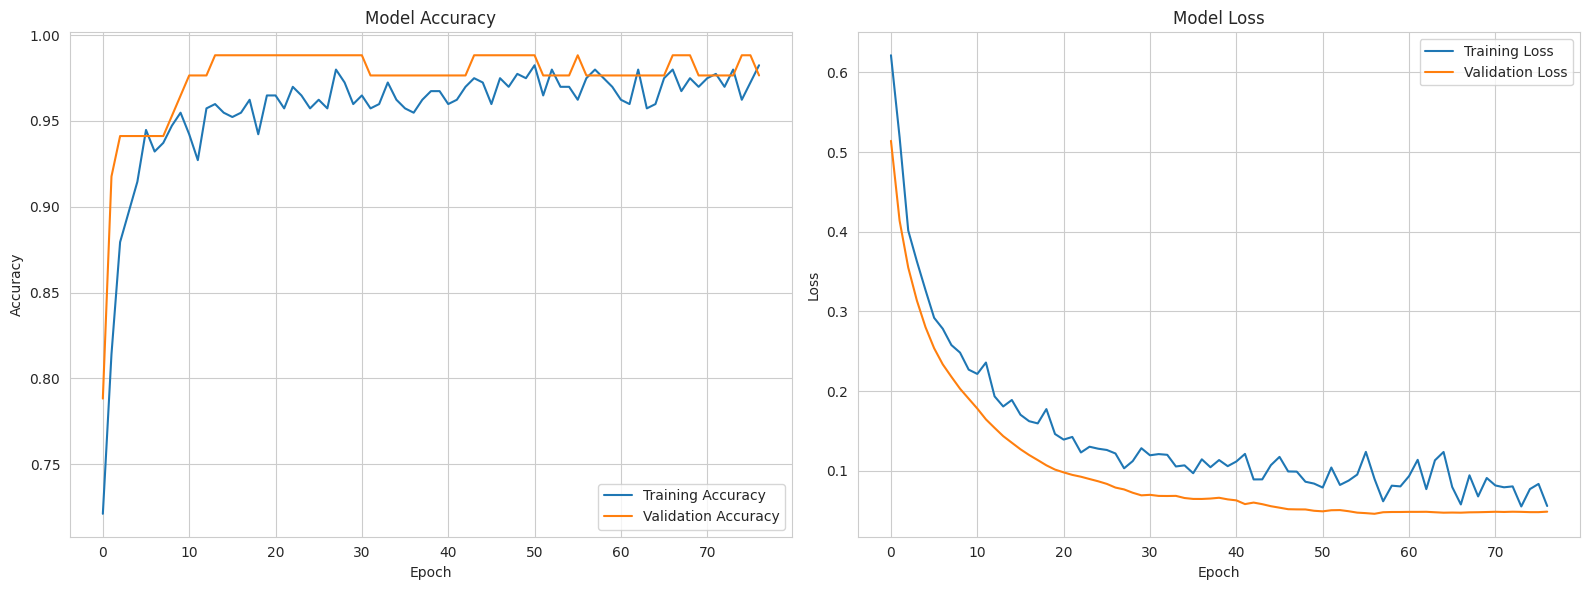

In [8]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Test Loss: 0.1041
Test Accuracy: 0.9535
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Classification Report:
              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        32
      benign       0.96      0.96      0.96        54

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.95      0.95      0.95        86



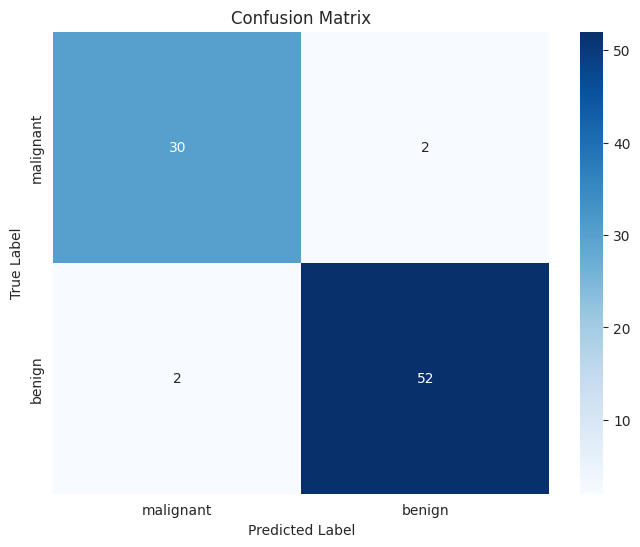

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

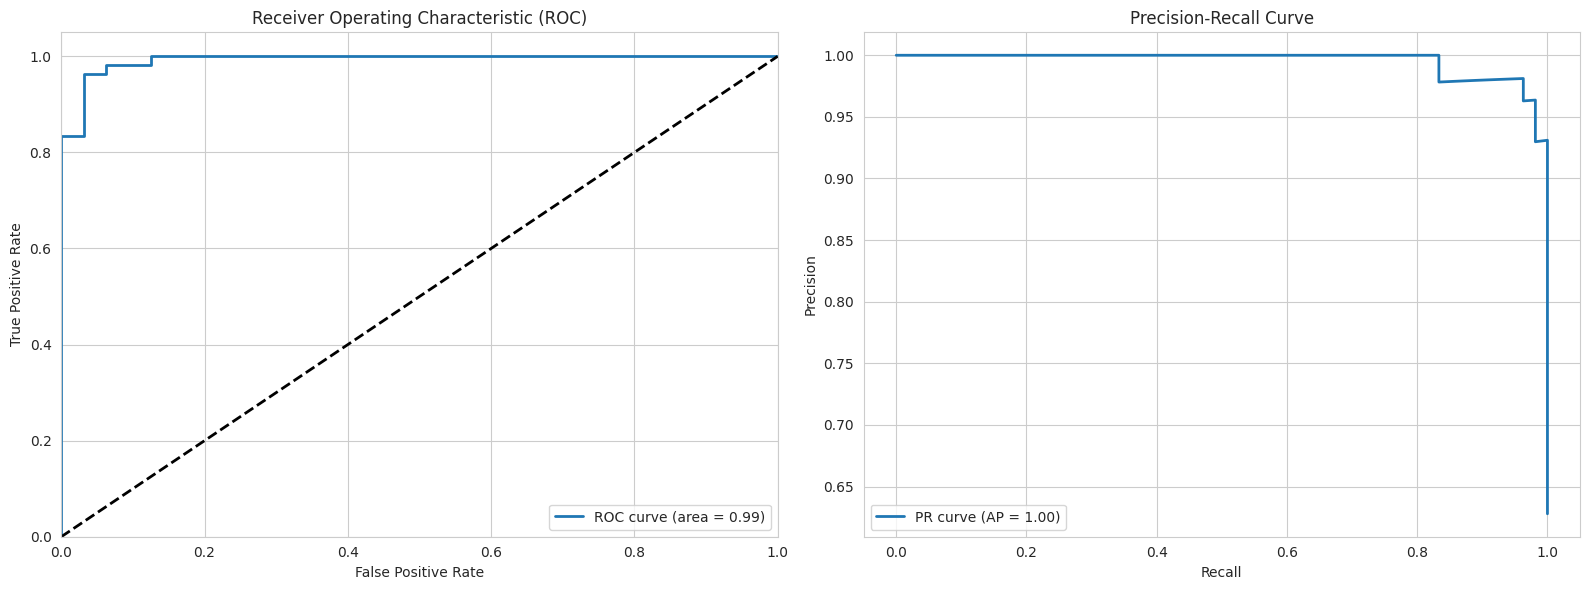

In [10]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot ROC curve and Precision-Recall curve
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. Neural Networks for Regression

Now, let's implement a neural network for a regression task using the Diabetes dataset.

In [11]:
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Print basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Feature names: {feature_names}")
print(f"Target range: [{y.min()}, {y.max()}]")
print(f"Target mean: {y.mean():.2f}, std: {y.std():.2f}")

Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target range: [25.0, 346.0]
Target mean: 152.13, std: 77.01


In [12]:
# Create a DataFrame for easier data visualization
diabetes_df = pd.DataFrame(X, columns=feature_names)
diabetes_df['target'] = y

# Display the first few rows
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


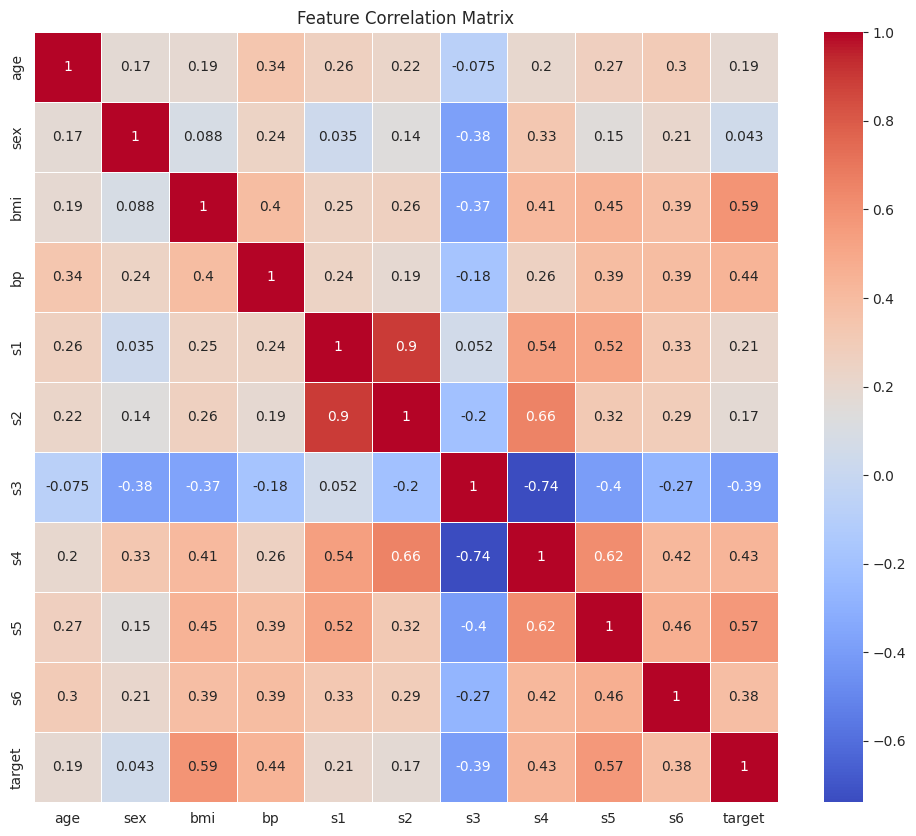

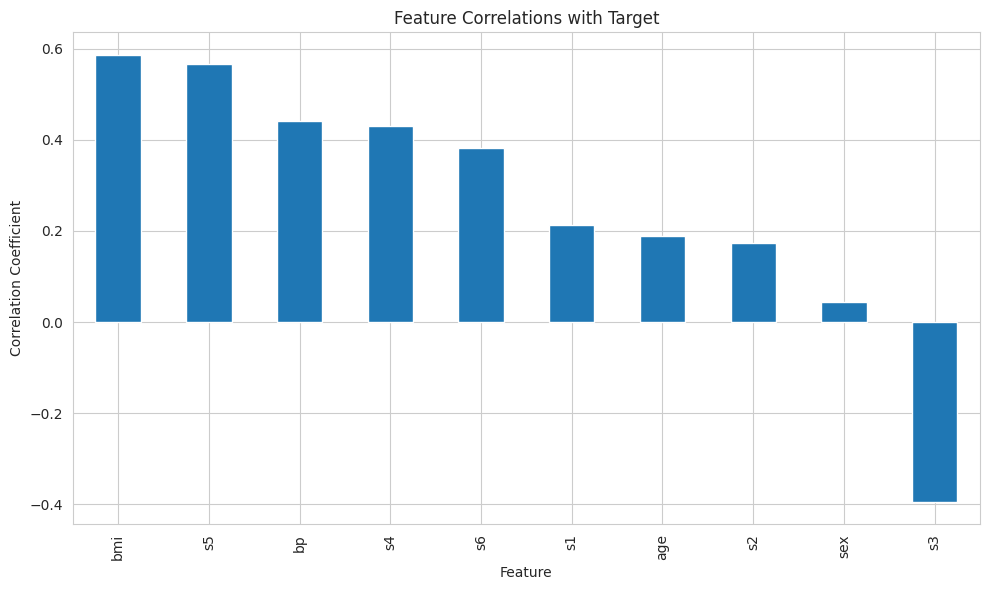

In [13]:
# Correlation analysis
plt.figure(figsize=(12, 10))
correlation = diabetes_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Feature correlations with target
correlations_with_target = correlation['target'].drop('target').sort_values(ascending=False)
plt.figure(figsize=(10, 6))
correlations_with_target.plot(kind='bar')
plt.title('Feature Correlations with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation Coefficient')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [14]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

# Standardize the target (optional but can help with neural network training)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

Training set shape: (309, 10)
Validation set shape: (66, 10)
Testing set shape: (67, 10)


In [15]:
# Build a neural network model for regression
def create_nn_regressor(input_shape, hidden_layers=[64, 32, 16], dropout_rate=0.2):
    model = Sequential()

    # Input layer
    model.add(Dense(hidden_layers[0], input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))

    # Output layer for regression (single unit, linear activation)
    model.add(Dense(1, activation='linear'))

    return model

# Create the model
input_shape = X_train_scaled.shape[1]
regression_model = create_nn_regressor(input_shape)

# Compile the model
regression_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae']  # Mean Absolute Error
)

# Display model summary
regression_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,553 (13.88 KB)

 Non-trainable params: 224 (896.00 B)

In [16]:
# Set up callbacks for training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

# Train the model
regression_history = regression_model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,
    batch_size=16,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.1411 - mae: 1.1103 - val_loss: 0.6216 - val_mae: 0.6573 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6484 - mae: 1.0156 - val_loss: 0.5538 - val_mae: 0.6206 - learning_rate: 0.0010
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3558 - mae: 0.9262 - val_loss: 0.5363 - val_mae: 0.6078 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0046 - mae: 0.7982 - val_loss: 0.5249 - val_mae: 0.5980 - learning_rate: 0.0010
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0985 - mae: 0.8395 - val_loss: 0.4976 - val_mae: 0.5813 - learning_rate: 0.0010
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0308 - mae: 0.8038 - val_loss: 0.4883 - val_mae: 0.5652 - learning_rate: 0.0010
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0434 - mae: 0.8183 - val_loss: 0.4981 - val_mae: 0.5625 - learning_rate: 0.0010
Epoch 8/200


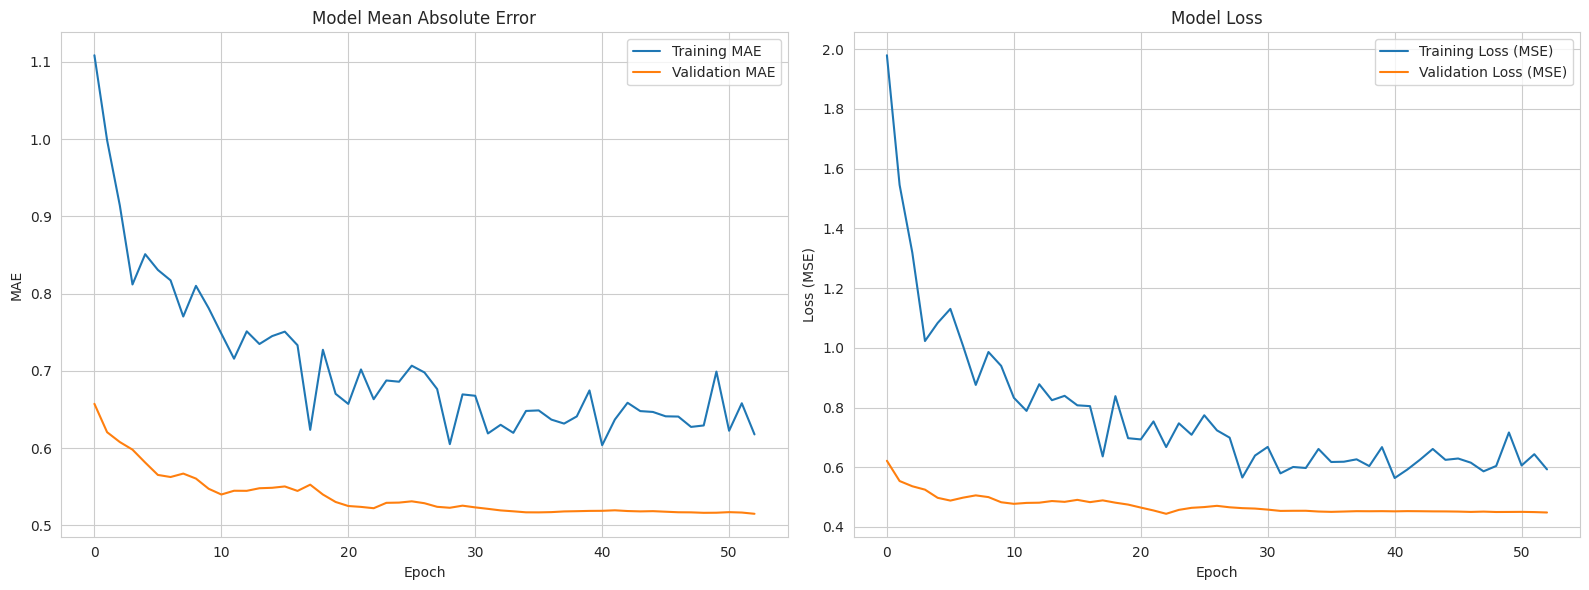

In [17]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot mean absolute error
plt.subplot(1, 2, 1)
plt.plot(regression_history.history['mae'], label='Training MAE')
plt.plot(regression_history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(regression_history.history['loss'], label='Training Loss (MSE)')
plt.plot(regression_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Evaluate the model on the test set
test_loss, test_mae = regression_model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (MSE, scaled): {test_loss:.4f}")
print(f"Test MAE (scaled): {test_mae:.4f}")

# Make predictions on the test set
y_pred_scaled = regression_model.predict(X_test_scaled).flatten()

# Inverse transform the predictions and actual values back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = y_test  # Already in original scale

# Calculate metrics on original scale
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print(f"\nMetrics on original scale:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Test Loss (MSE, scaled): 0.5473
Test MAE (scaled): 0.6079
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

Metrics on original scale:
Mean Squared Error: 3364.72
Root Mean Squared Error: 58.01
R² Score: 0.4074


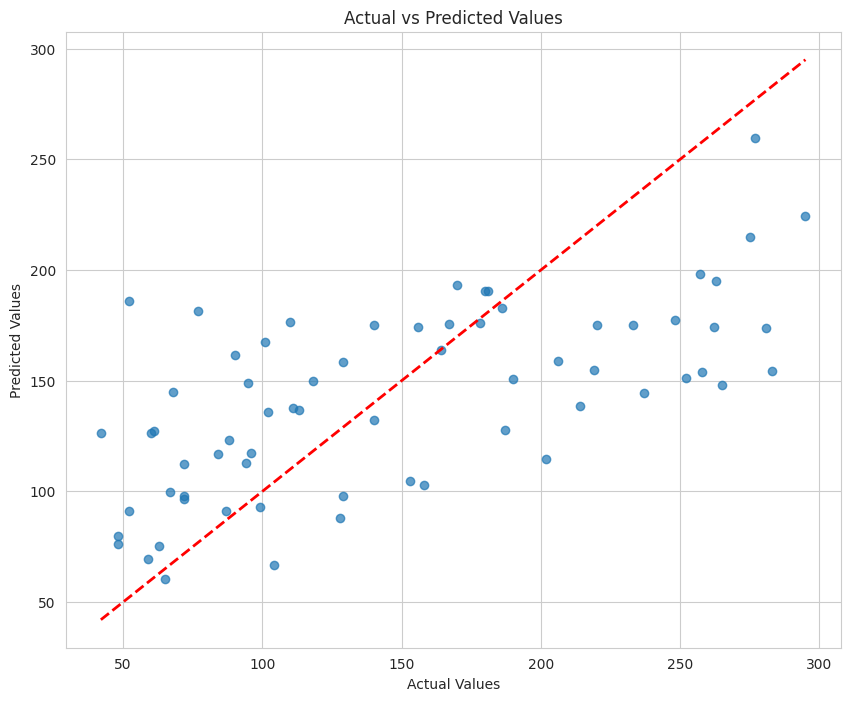

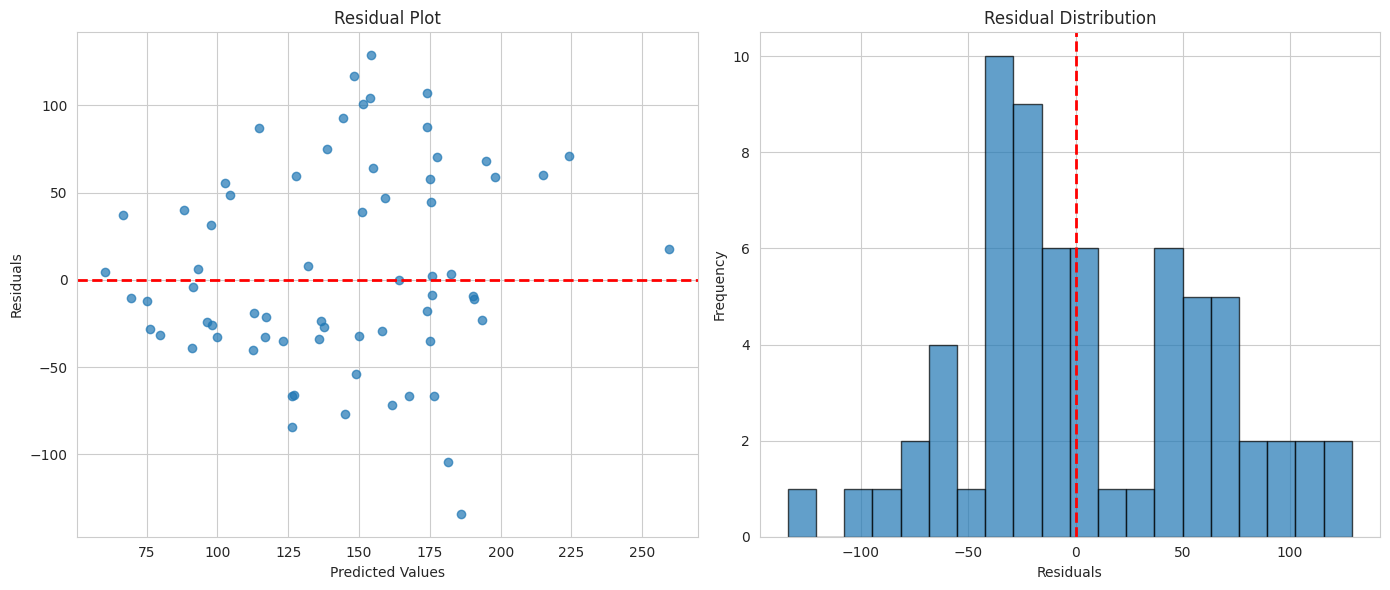

In [19]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test_original, y_pred, alpha=0.7)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test_original - y_pred
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Hyperparameter Tuning

Let's explore how different hyperparameters affect the performance of our neural networks.

In [20]:
# Function to create and train a model with given hyperparameters
def train_model_with_params(X_train, y_train, X_val, y_val,
                           hidden_layers, dropout_rate, learning_rate, batch_size,
                           task='classification'):

    input_shape = X_train.shape[1]

    if task == 'classification':
        # Create classification model
        model = Sequential()

        # Input layer
        model.add(Dense(hidden_layers[0], input_shape=(input_shape,)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))

        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(Dense(units))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(dropout_rate))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Compile
        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        # Early stopping
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=0
        )

        # Train
        history = model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate
        _, val_acc = model.evaluate(X_val, y_val, verbose=0)
        return model, history, val_acc

    else:  # Regression
        # Create regression model
        model = Sequential()

        # Input layer
        model.add(Dense(hidden_layers[0], input_shape=(input_shape,)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(dropout_rate))

        # Hidden layers
        for units in hidden_layers[1:]:
            model.add(Dense(units))
            model.add(BatchNormalization())
            model.add(Activation('relu'))
            model.add(Dropout(dropout_rate))

        # Output layer
        model.add(Dense(1, activation='linear'))

        # Compile
        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mse',
            metrics=['mae']
        )

        # Early stopping
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True,
            verbose=0
        )

        # Train
        history = model.fit(
            X_train, y_train,
            epochs=150,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate
        val_loss, _ = model.evaluate(X_val, y_val, verbose=0)
        return model, history, -val_loss  # Negative MSE as score (higher is better)

In [22]:
# Hyperparameter tuning for classification model
results = []

# Define parameter grid
hidden_layer_options = [[16, 8], [32, 16]]
dropout_options = [0.1]
learning_rate_options = [0.01]
batch_size_options = [16, 32]

print("Running hyperparameter tuning for classification model...")
for hidden_layers in hidden_layer_options:
    for dropout_rate in dropout_options:
        for learning_rate in learning_rate_options:
            for batch_size in batch_size_options:
                # Train model with these parameters
                _, _, val_acc = train_model_with_params(
                    X_train_scaled, y_train, X_val_scaled, y_val,
                    hidden_layers, dropout_rate, learning_rate, batch_size,
                    task='classification'
                )

                # Store results
                results.append({
                    'hidden_layers': hidden_layers,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate,
                    'batch_size': batch_size,
                    'val_accuracy': val_acc
                })

                print(f"Parameters: {hidden_layers}, {dropout_rate}, {learning_rate}, {batch_size} - Val Acc: {val_acc:.4f}")

# Convert results to DataFrame and sort by validation accuracy
results_df = pd.DataFrame(results).sort_values('val_accuracy', ascending=False)

# Display top 10 best configurations
print("\nTop 10 Best Configurations:")
results_df.head(10)

Running hyperparameter tuning for classification model...
Parameters: [16, 8], 0.1, 0.01, 16 - Val Acc: 0.0000
Parameters: [16, 8], 0.1, 0.01, 32 - Val Acc: 0.0000
Parameters: [32, 16], 0.1, 0.01, 16 - Val Acc: 0.0000
Parameters: [32, 16], 0.1, 0.01, 32 - Val Acc: 0.0000

Top 10 Best Configurations:


,hidden_layers,dropout_rate,learning_rate,batch_size,val_accuracy
0,"[16, 8]",0.1,0.01,16,0.0
1,"[16, 8]",0.1,0.01,32,0.0
2,"[32, 16]",0.1,0.01,16,0.0
3,"[32, 16]",0.1,0.01,32,0.0


In [23]:
# Train a final model with the best hyperparameters
best_config = results_df.iloc[0]
print(f"Training final model with best hyperparameters: {best_config.to_dict()}")

best_model, best_history, _ = train_model_with_params(
    X_train_scaled, y_train, X_val_scaled, y_val,
    best_config['hidden_layers'], best_config['dropout_rate'],
    best_config['learning_rate'], best_config['batch_size'],
    task='classification'
)

# Evaluate on test set
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nBest Model Test Accuracy: {test_accuracy:.4f}")
print(f"Best Model Test Loss: {test_loss:.4f}")

Training final model with best hyperparameters: {'hidden_layers': [16, 8], 'dropout_rate': 0.1, 'learning_rate': 0.01, 'batch_size': 16, 'val_accuracy': 0.0}

Best Model Test Accuracy: 0.0000
Best Model Test Loss: -956349.7500


## 6. Saving and Loading Models

Once we have trained a model, we can save it for later use.

In [24]:
# Create directory for saving models
import os
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save the best model
best_model_path = os.path.join(models_dir, 'nn_binary_classifier.h5')
best_model.save(best_model_path)
print(f"Model saved to {best_model_path}")

# Also save the scaler for preprocessing new data
import joblib
scaler_path = os.path.join(models_dir, 'feature_scaler.joblib')
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

Model saved to models/nn_binary_classifier.h5
Scaler saved to models/feature_scaler.joblib


## 7. Conclusion

In this notebook, we explored the fundamentals of Artificial Neural Networks and implemented them for both classification and regression tasks. We covered the following key topics:

1. **Mathematical Foundation**: Understanding the forward and backward propagation processes.
2. **Network Architecture**: Building ANNs with various layer configurations.
3. **Training Process**: Using optimization algorithms and callbacks for effective training.
4. **Evaluation Metrics**: Assessing model performance with appropriate metrics.
5. **Hyperparameter Tuning**: Finding optimal hyperparameters to improve performance.
6. **Model Persistence**: Saving and loading trained models for later use.

Neural networks have shown excellent performance on our datasets, demonstrating their capability to model complex relationships. However, simple neural networks like the ones we implemented here are just the beginning. In the next parts of our neural network exploration, we'll dive into more advanced architectures and techniques.